## Focus sur la fréquentation des stations voyageurs

Ce jeu de données (`Fréquentation en gares`) représente la fréquentation annuelle de l'ensemble des 3000 gares voyageurs de 2015 à 2021.

Ces informations sont issues d’une part, des données de billetterie pour le trafic national et régional hors Ile-de-France et d’autre part, d’une extrapolation pour le trafic régional Ile-de-France à partir des comptages effectués tous les 3 à 4 ans et publiés par ailleurs en Open Data.

A noter, pour les années 2020 et 2021 peu de comptages ont été réalisés pour le trafic régional Ile-de-France en raison de la crise sanitaire. La fréquentation a été calculée en relatif par rapport aux évolutions des validations en gare observées depuis 2019.


Une estimation de la proportion de non voyageurs est réalisée à partir des enquêtes en gare. En l'absence d’enquête, un taux par défaut est défini (20% pour les gares a et b hors Ile-de-France et 0% pour les gares b Ile-de-France et c).


La méthodologie de calcul se précise année après année avec une reprise de l'historique pouvant expliquer des variations dans les données publiées d'une année sur l'autre. Pour toute question, vous pouvez nous l'adresser au travers du formulaire de contact du portail Open Data.

***Informations du site open data de la [SNCF](https://ressources.data.sncf.com/explore/dataset/frequentation-gares/information/?disjunctive.nom_gare&disjunctive.code_postal&sort=nom_gare)***

### Récupération des données de fréquentation des gares

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
import requests as rq
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
url_freq = "https://ressources.data.sncf.com/api/v2/catalog/datasets/frequentation-gares/exports" + "/json?limit=-1" + "&offset=0" + "&lang=fr" + "&timezone=Europe%2FParis" # url de l'API pour acccéder aux données
dataFreq = rq.get(url_freq)
dataFreq = dataFreq.json() 
dataFreq = pd.json_normalize(dataFreq)

In [19]:
dataFreq.shape
dataFreq.head()
dataFreq.tail()

,nom_gare,code_uic_complet,code_postal,segmentation_drg,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
2965,Étalans,87718536,25580,c,50499,50499,48741,48741,48324,48324,43353,43353,48453,48453,47593,47593,45347,45347
2966,Étaples - Le Touquet,87317065,62630,b,396110,425925,268566,288781,388912,418185,354757,381459,377338,405740,358759,385762,389755,419092
2967,Étriché - Châteauneuf,87484154,49330,c,25656,25656,20760,20760,50986,50986,61562,61562,57633,57633,55988,55988,57751,57751
2968,Évreux Normandie,87387001,27000,a,787499,984374,693195,866494,1129373,1411717,1089292,1361615,1162631,1453288,1107913,1384892,1139477,1424346
2969,Évron,87478552,53600,b,120082,150103,93350,116687,162097,202621,181310,226638,192127,240159,187563,234454,181167,226459


Comme on peut le voir, les totaux du nombre de voyageurs et du total combiné  "**voyageurs**_**non-voyageurs**" sont fournis de 2015 à 2022, soit sur les sept (07) dernière années.

Dans le jeu de données , 
* **total_voyageurs** représsente le nombre total de personnes ayant validé leur passe et ayant réellement voayagé voyageurs sur toute l'année
* **total_voyageurs_non_voyageurs** représente le nombre total de personnes ayant validé leur pass annuellement

 ### Examination du jeu de données

In [20]:
dataFreq.describe()

,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,totalvoyageurs2017,total_voyageurs_non_voyageurs_2017,total_voyageurs_2016,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015
count,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03
mean,6.672200e+05,7.478594e+05,4.837688e+05,5.490022e+05,9.314776e+05,1.031127e+06,9.144236e+05,1.008928e+06,9.307166e+05,1.030075e+06,9.031314e+05,9.973289e+05,8.927839e+05,9.872118e+05
std,3.917522e+06,4.683824e+06,3.248584e+06,4.019528e+06,6.158139e+06,7.076454e+06,6.141102e+06,7.031097e+06,6.220921e+06,7.138968e+06,6.081035e+06,6.961654e+06,5.998772e+06,6.869507e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.099250e+03,8.099250e+03,6.171750e+03,6.171750e+03,8.453250e+03,8.453250e+03,7.285500e+03,7.285500e+03,8.174500e+03,8.174500e+03,8.254000e+03,8.254000e+03,8.686500e+03,8.686500e+03
50%,4.042850e+04,4.106350e+04,3.221800e+04,3.235050e+04,4.631900e+04,4.649300e+04,4.251950e+04,4.311800e+04,4.546250e+04,4.565150e+04,4.454450e+04,4.510600e+04,4.483300e+04,4.519050e+04
75%,2.120355e+05,2.553358e+05,1.611745e+05,1.938645e+05,2.504645e+05,3.018378e+05,2.290105e+05,2.790520e+05,2.428225e+05,2.934318e+05,2.337628e+05,2.785228e+05,2.344042e+05,2.835198e+05
max,1.266222e+08,1.488492e+08,1.144684e+08,1.526245e+08,2.447599e+08,2.728985e+08,2.445024e+08,2.718245e+08,2.480071e+08,2.759626e+08,2.423198e+08,2.687749e+08,2.384241e+08,2.639942e+08


In [21]:
np.sum(dataFreq.isnull())

nom_gare                              0
code_uic_complet                      0
code_postal                           0
segmentation_drg                      9
total_voyageurs_2021                  0
total_voyageurs_non_voyageurs_2021    0
total_voyageurs_2020                  0
total_voyageurs_non_voyageurs_2020    0
total_voyageurs_2019                  0
total_voyageurs_non_voyageurs_2019    0
total_voyageurs_2018                  0
total_voyageurs_non_voyageurs_2018    0
totalvoyageurs2017                    0
total_voyageurs_non_voyageurs_2017    0
total_voyageurs_2016                  0
total_voyageurs_non_voyageurs_2016    0
total_voyageurs_2015                  0
total_voyageurs_non_voyageurs_2015    0
dtype: int64

On peut remarquer qu'il n'y aucune valeur manquante dans le jeu. 
En effet, les données qui pouvaient potentiellement l'être ont été estimées (`2020`, `2021`, ...)

En particulier, les données de `2020` et `2021` sont supposées être celles qu'on aurait obtenu sans la pandémie.

Examinons le nombre de **non_voyageurs** sur les différentes années.

In [22]:
dataFreq.rename(columns = {"totalvoyageurs2017" : "total_voyageurs_2017"}, inplace = True)

In [23]:
for an in range(2015,2022) :
    dataFreq["diff_{}".format(an)] = dataFreq["total_voyageurs_non_voyageurs_{}".format(an)] - dataFreq["total_voyageurs_{}".format(an)]

In [24]:
dataFreq.describe()

,total_voyageurs_2021,total_voyageurs_non_voyageurs_2021,total_voyageurs_2020,total_voyageurs_non_voyageurs_2020,total_voyageurs_2019,total_voyageurs_non_voyageurs_2019,total_voyageurs_2018,total_voyageurs_non_voyageurs_2018,total_voyageurs_2017,total_voyageurs_non_voyageurs_2017,...,total_voyageurs_non_voyageurs_2016,total_voyageurs_2015,total_voyageurs_non_voyageurs_2015,diff_2015,diff_2016,diff_2017,diff_2018,diff_2019,diff_2020,diff_2021
count,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,...,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03,2.970000e+03
mean,6.672200e+05,7.478594e+05,4.837688e+05,5.490022e+05,9.314776e+05,1.031127e+06,9.144236e+05,1.008928e+06,9.307166e+05,1.030075e+06,...,9.973289e+05,8.927839e+05,9.872118e+05,9.442784e+04,9.419746e+04,9.935795e+04,9.450396e+04,9.964959e+04,6.523343e+04,8.063940e+04
std,3.917522e+06,4.683824e+06,3.248584e+06,4.019528e+06,6.158139e+06,7.076454e+06,6.141102e+06,7.031097e+06,6.220921e+06,7.138968e+06,...,6.961654e+06,5.998772e+06,6.869507e+06,1.060698e+06,1.070256e+06,1.107720e+06,1.076057e+06,1.101272e+06,8.415802e+05,8.825434e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.099250e+03,8.099250e+03,6.171750e+03,6.171750e+03,8.453250e+03,8.453250e+03,7.285500e+03,7.285500e+03,8.174500e+03,8.174500e+03,...,8.254000e+03,8.686500e+03,8.686500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.042850e+04,4.106350e+04,3.221800e+04,3.235050e+04,4.631900e+04,4.649300e+04,4.251950e+04,4.311800e+04,4.546250e+04,4.565150e+04,...,4.510600e+04,4.483300e+04,4.519050e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.120355e+05,2.553358e+05,1.611745e+05,1.938645e+05,2.504645e+05,3.018378e+05,2.290105e+05,2.790520e+05,2.428225e+05,2.934318e+05,...,2.785228e+05,2.344042e+05,2.835198e+05,9.563000e+03,9.775500e+03,1.017275e+04,9.798000e+03,1.048325e+04,6.769750e+03,8.317250e+03
max,1.266222e+08,1.488492e+08,1.144684e+08,1.526245e+08,2.447599e+08,2.728985e+08,2.445024e+08,2.718245e+08,2.480071e+08,2.759626e+08,...,2.687749e+08,2.384241e+08,2.639942e+08,3.572191e+07,3.625731e+07,3.665225e+07,3.602526e+07,3.578014e+07,3.815613e+07,3.050073e+07


Les moyennes des totaux des **non_voyageurs** répertoriés annuellement dans les gares de la SNCF ne sont pas négligeables. Elles varient entre 65.000 environ et 90.000 par station chaque année.

### Visualisations

#### Evolution de la fréquentation des gares SNCF de 2015à 2021

In [25]:
National = np.sum(dataFreq, axis = 0)

C:\Users\guysa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return reduction(axis=axis, out=out, **passkwargs)


In [26]:
National = National.reset_index().T
National.columns = National.iloc[0]

In [27]:
dataFreqV = dataFreq.append(National.iloc[1]) # Ajout d'une ligne pour les chiffres nationaux

C:\Users\guysa\AppData\Local\Temp\ipykernel_10204\2265211458.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataFreqV = dataFreq.append(National.iloc[1]) # Ajout d'une ligne pour les chiffres nationaux


In [28]:
plt.style.use("seaborn")

C:\Users\guysa\AppData\Local\Temp\ipykernel_10204\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

Text(0.5, 1.0, 'Evolution du nombre de voyageurs dans les gares au plan national')

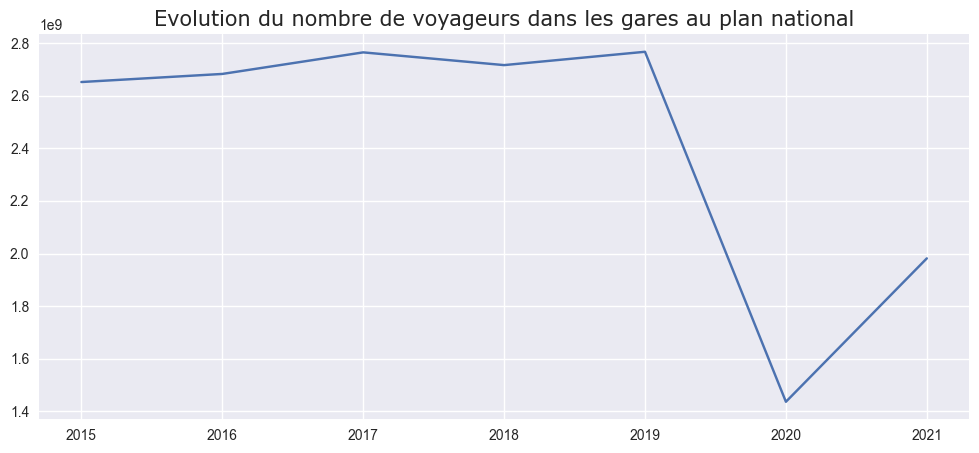

In [31]:
plt.figure(figsize = (12,5))
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)]].iloc[-1].plot()
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])
plt.title("Evolution du nombre de voyageurs dans les gares au plan national", fontsize  = 15, fontfamily = "verdana")

([<matplotlib.axis.XTick at 0x1b64c4755d0>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

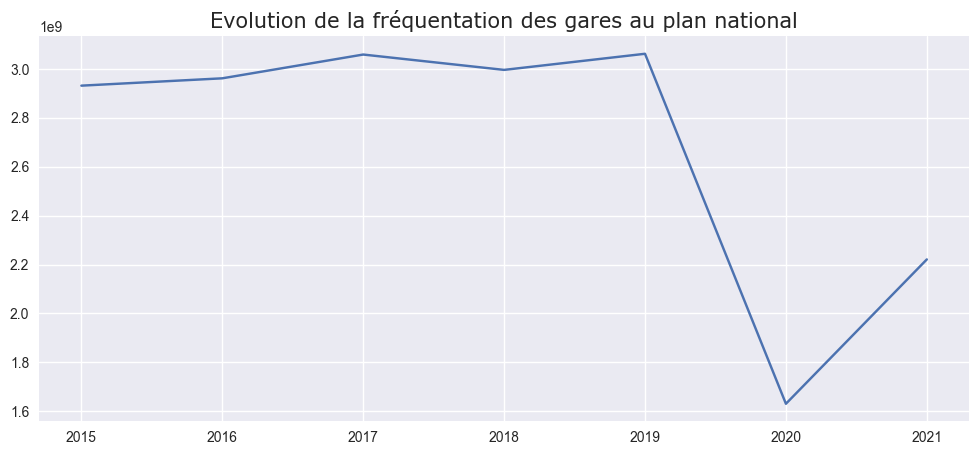

In [34]:
plt.figure(figsize = (12,5))
dataFreqV[["total_voyageurs_non_voyageurs_{}".format(an) for an in range(2015, 2022)]].iloc[-1].plot()
plt.title("Evolution de la fréquentation des gares au plan national", fontsize  = 15, fontfamily = "verdana")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])

Aucultons l'évolution par région

In [35]:
dataFreqV["code_depart"] = dataFreqV["code_postal"].str[0:2] # Extraction du code desdépartements

In [36]:
# Importation de la liste des départements et régions associées
url_api_regions = "https://geo.api.gouv.fr/departements?fields=nom,region,zone"
regions = rq.get(url_api_regions)
regions = pd.json_normalize(regions.json())
regions.head()
regions.tail()
regions.shape

(101, 5)

In [37]:
regions.rename(columns={"code" : "code_depart"}, inplace=True)

In [38]:
dataFreqV = dataFreqV.merge(regions, how="left")

([<matplotlib.axis.XTick at 0x1b64ce93b50>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

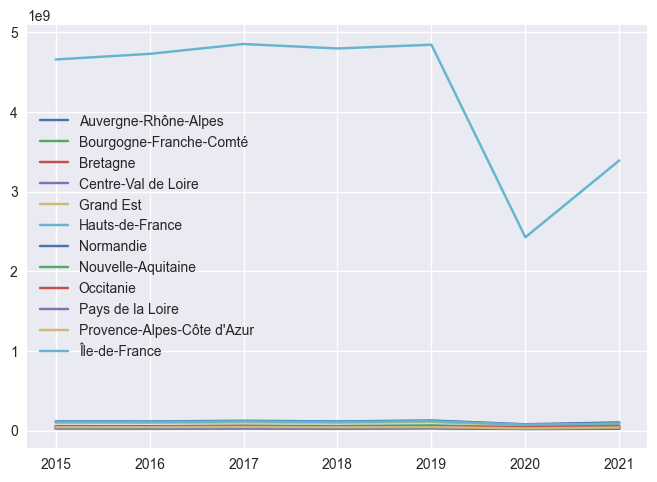

In [45]:
#fig = plt.figure().subplots_adjust()

dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)] + ["region.nom"]].groupby("region.nom").sum().T.plot()
plt.legend(title = "")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])

L'Ile-de-France possède des valeurs qui s'écartent significativement de celles des autres départements.
Pour cela, séparons l'Ile-De-France afin de mieux visualiser l'évolution du nombre de voyageurs dans chaque région.

([<matplotlib.axis.XTick at 0x1b64cb3d930>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

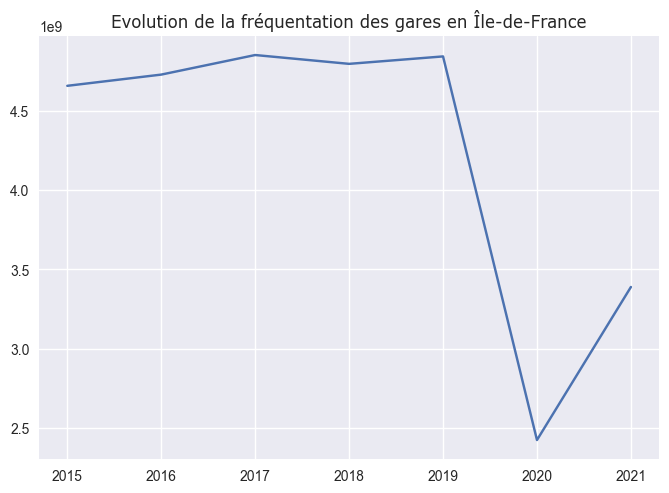

In [46]:
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)] + ["region.nom"]].groupby("region.nom").sum().loc['Île-de-France'].plot()
plt.title("Evolution de la fréquentation des gares en Île-de-France", fontsize  = 12, fontfamily = "verdana")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])

On remarque une même tendance avec l'évolution national du nombre de voyageurs.

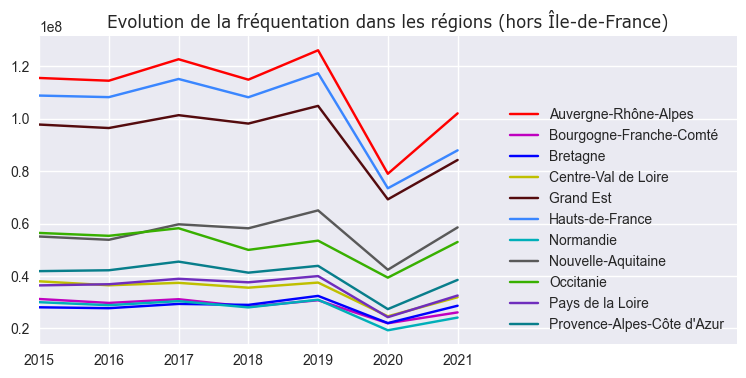

In [47]:
fig, ax = plt.subplots(figsize=(9, 4))
dataFreqV[["total_voyageurs_{}".format(an) for an in range(2015, 2022)] + ["region.nom"]].groupby("region.nom").sum().iloc[0:-1].T.plot(ax = ax, color = ['r', 'm', "b", "y", "#540b0e", "#3a86ff", "#00afb9", "#595959", "#38b000", "#6f2dbd", "#087e8b"])
plt.title("Evolution de la fréquentation dans les régions (hors Île-de-France)", fontsize  = 12, fontfamily = "verdana")
plt.xticks(ticks = range(7), labels=["20{}".format(an) for an in range(15,22)])
plt.xlim([0,10])
plt.legend(loc = "lower right")
plt.show()

Globalement, l'évolution du nombre de voyageurs a suivi la même tendance dans toutes les régions métropolitaines. 
Chaque région a maintenu son classement le long des sept(07) dernière années hormis quelques fois où des régions on interchangé leurs positions :
* la **Nouvelle-Aquitaine** est passée au dessus de l'**Occitanie** à partir l'année 2016
* la **Bretagne**, le **Bourgogne-Franche-Comté** et la **Normandie** occupant les trois dernières positions et s'échangeant mutuellement leurs places dans la hiérachie.

Nous allons maintenant réaliser des heatmaps afin de visualiser la densité par aire géographique